In [3]:
# import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense

In [4]:
# instatiate teh model
model=Sequential()

In [6]:
# add conv layers
model.add(Conv2D(filters=32,
                 kernel_size=32,
                 activation ='relu',
                 input_shape=(64,64,3),
                 strides = (1,1),
                 padding="same",
                 use_bias="True"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
#flatten feature maps
model.add(Flatten())

In [9]:
# add fully connected layers
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [11]:
# summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,294,058 (16.38 MB)

 Trainable params: 4,294,058 (16.38 MB)

 Non-trainable params: 0 (0.00 B)

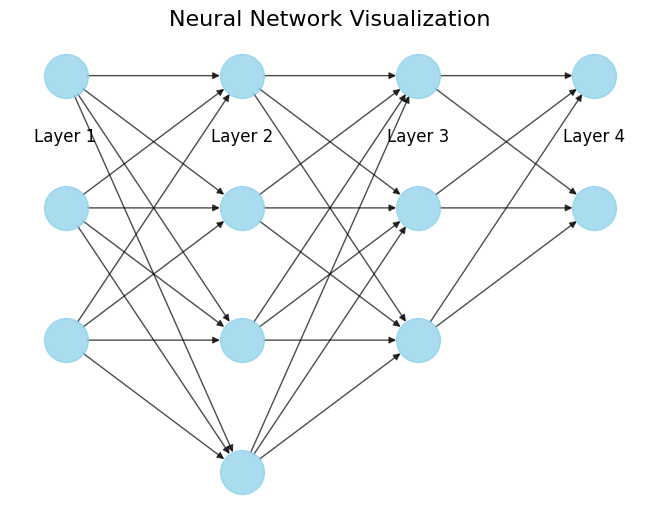

In [12]:
## lets visualize this
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(layers):
    """
    Visualizes a simple neural network using matplotlib.

    Parameters:
        layers (list): A list of integers where each element represents the number of neurons in that layer.
    """
    G = nx.DiGraph()

    # Create nodes for each layer
    layer_positions = []
    x = 0
    for i, layer_size in enumerate(layers):
        layer = [(x, j) for j in range(layer_size)]
        layer_positions.extend(layer)
        x += 1

    # Add nodes and edges
    for i in range(len(layers) - 1):
        current_layer = [(i, j) for j in range(layers[i])]
        next_layer = [(i + 1, k) for k in range(layers[i + 1])]
        for node in current_layer:
            for next_node in next_layer:
                G.add_edge(node, next_node)

    pos = {node: (node[0], -node[1]) for node in layer_positions}
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color='skyblue', edge_color='black', alpha=0.7)

    # Add labels for layers
    for i in range(len(layers)):
        plt.text(i, max(-layers[i] / 2, -0.5), f'Layer {i+1}', fontsize=12, ha='center')

    plt.title("Neural Network Visualization", fontsize=16)
    plt.axis('off')
    plt.show()

# Example: 3 inputs, 4 neurons in hidden layer 1, 3 neurons in hidden layer 2, 2 outputs
draw_neural_network([3, 4, 3, 2])
